<a href="https://colab.research.google.com/github/het-khatusuriya/ML/blob/main/d22ce166_NN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:, 1:5].values
Y = dataset.iloc[:, 5].values

In [ ]:
# converting the string target column to integer categorical column

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(Y)

from keras.utils import to_categorical
Y = to_categorical(y1, num_classes = 3, dtype ="int32")

In [ ]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
# will split the data in training and testing data with 20%, So, after that Train data= 120 and test data=30
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
# Shape of all train and test data
print("X_train is:",X_train.shape)
print("Y_train is:",Y_train.shape)
print("X_test is:",X_test.shape)
print("Y_test is:",Y_test.shape)

X_train is: (120, 4)
Y_train is: (120, 3)
X_test is: (30, 4)
Y_test is: (30, 3)


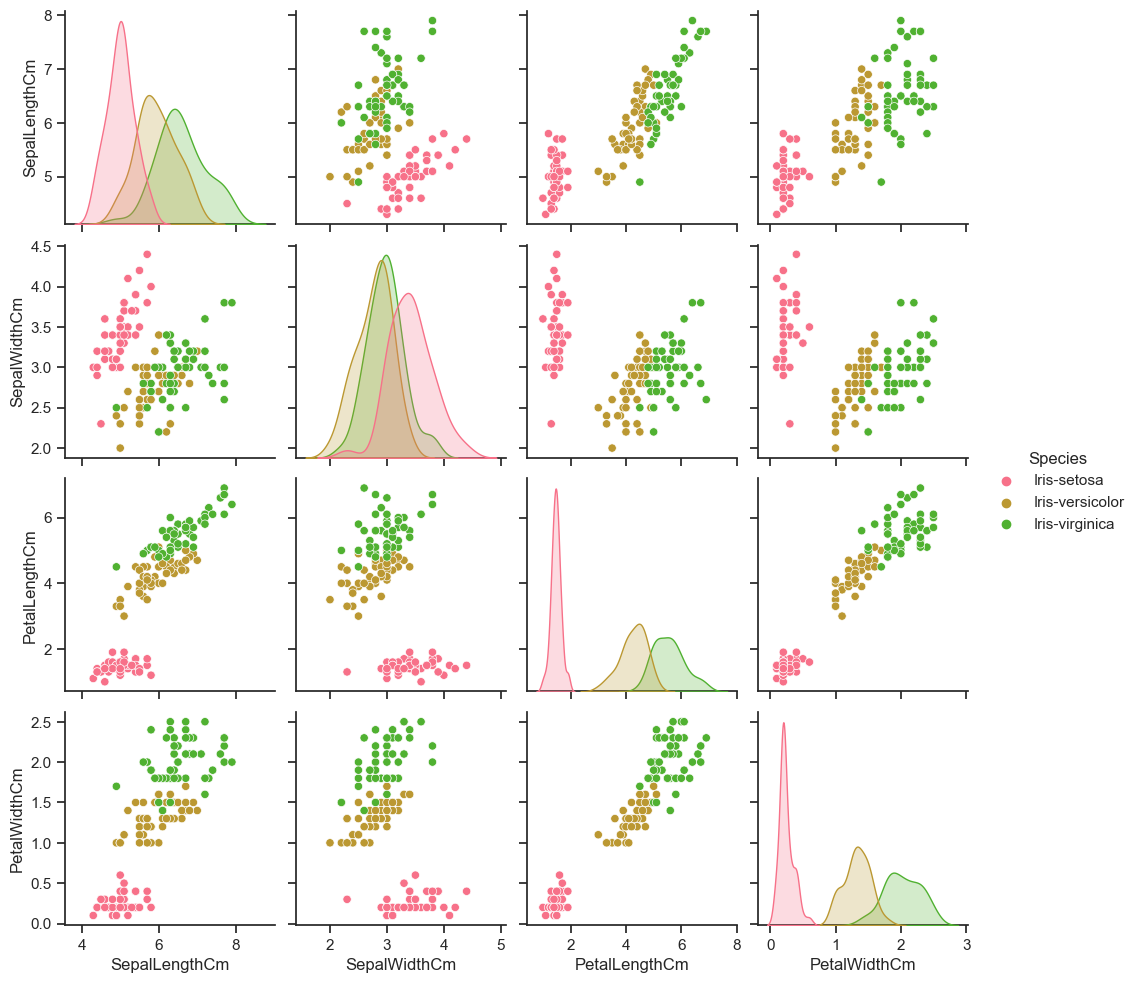

In [ ]:
# visulizaton of the dataset
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,1:6],hue="Species")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
# building the structure of the Neural Network

model = Sequential()
#model.add(tf.keras.Input(shape=(4,)))
model.add(Dense(3,input_dim=4, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of the NN Structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 53 (212.00 Byte)
Trainable params: 53 (212.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Check initialized weights
print(model.get_weights())

[array([[-0.30239373,  0.4869299 ,  1.1025676 ],
       [-1.1394687 , -0.52351743,  0.6583768 ],
       [-0.05558574, -0.29464108,  0.9146329 ],
       [-0.86149186,  0.49172926, -0.67107713]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[-0.20332384, -0.35240608, -0.3098005 ,  0.05102015,  0.4119094 ],
       [ 0.12693125,  0.7593344 , -0.2440815 , -0.66043377,  0.70599884],
       [-0.28838164,  0.6197191 , -0.5756343 ,  0.27279872, -0.29053438]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.34651494,  0.25320524, -0.23574334],
       [ 0.05765402, -0.8579656 , -0.14988649],
       [-0.48956847,  0.5932513 , -0.50652164],
       [-0.765449  ,  0.8557268 , -0.74003816],
       [-0.19783282,  0.7468851 ,  0.07134175]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [ ]:
# Training a model on Train data and at the end it will updates the weights.
history= model.fit(X_train, Y_train, epochs=300, batch_size=8, validation_split=0.1)

Epoch 1/300
14/14 [==============================] - 2s 15ms/step - loss: 1.6696 - accuracy: 0.3148 - val_loss: 1.4815 - val_accuracy: 0.4167
Epoch 2/300
14/14 [==============================] - 0s 20ms/step - loss: 1.4092 - accuracy: 0.3148 - val_loss: 1.2819 - val_accuracy: 0.4167
Epoch 3/300
14/14 [==============================] - 1s 51ms/step - loss: 1.2637 - accuracy: 0.2407 - val_loss: 1.1957 - val_accuracy: 0.0833
Epoch 4/300
14/14 [==============================] - 0s 33ms/step - loss: 1.2081 - accuracy: 0.0833 - val_loss: 1.1624 - val_accuracy: 0.2500
Epoch 5/300
14/14 [==============================] - 0s 4ms/step - loss: 1.1809 - accuracy: 0.1204 - val_loss: 1.1561 - val_accuracy: 0.2500
Epoch 6/300
14/14 [==============================] - 0s 4ms/step - loss: 1.1509 - accuracy: 0.1296 - val_loss: 1.1602 - val_accuracy: 0.2500
Epoch 7/300
14/14 [==============================] - 0s 4ms/step - loss: 1.1353 - accuracy: 0.1481 - val_loss: 1.1677 - val_accuracy: 0.2500
Epoch 8/3

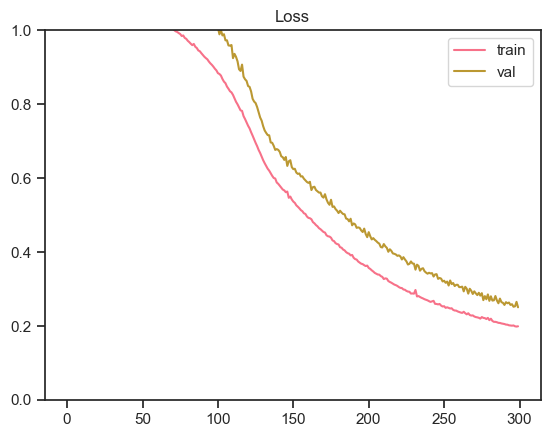

In [ ]:
# Graph of loss during training
from matplotlib import pyplot
pyplot.title('Loss')
pyplot.ylim([0,1])
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()

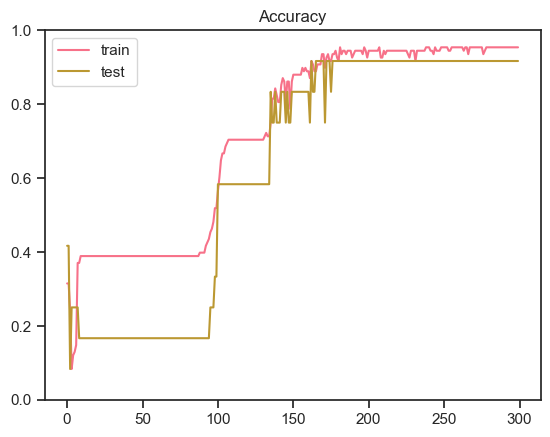

In [ ]:
# plot Accuracy during training
pyplot.title('Accuracy')
pyplot.ylim([0,1])
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print(model.metrics_names)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 54ms/step - loss: 0.2032 - accuracy: 0.9667
['loss', 'accuracy']

Accuracy: 96.67%


In [ ]:
# prediction of model on the test data
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
X_test[1,:], y_pred[1]

(array([6. , 2.2, 4. , 1. ]),
 array([0.0064873 , 0.80659884, 0.18691377], dtype=float32))

In [ ]:
# converting it into categorial data
y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
# comparing the actual and predicted values
y_test_class, y_pred_class

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0], dtype=int64),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0], dtype=int64))